In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
data_path = '/datasets/deep-learning-dseb-sem-7/Colab_workspaces/data/Deep Learning NEU/dataset.csv'
data = pd.read_csv(data_path)
data.rename(columns={"Lương": "Salary", "Thời gian làm việc": "WorkTime", "Cho vay":"Status" }, inplace=True)
data

,Salary,WorkTime,Status
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [3]:
_deepnote_run_altair(data, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Salary","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false},"axis":{"grid":false}},"y":{"field":"WorkTime","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"Status","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [98]:
X = data.drop(['Status'], inplace=False, axis=1)
y = np.array(data[['Status']]).reshape(len(y),)

In [99]:
def process_x(data):
    ones = np.ones(data.shape[0])
    X = np.column_stack((ones, data))
    return np.array(data)

In [100]:
X = process_x(X)

In [101]:
X

array([[10.  ,  1.  ],
       [ 5.  ,  2.  ],
       [ 6.  ,  1.8 ],
       [ 7.  ,  1.  ],
       [ 8.  ,  2.  ],
       [ 9.  ,  0.5 ],
       [ 4.  ,  3.  ],
       [ 5.  ,  2.5 ],
       [ 8.  ,  1.  ],
       [ 4.  ,  2.5 ],
       [ 8.  ,  0.1 ],
       [ 7.  ,  0.15],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.8 ],
       [ 7.  ,  0.3 ],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.5 ],
       [ 6.  ,  0.3 ],
       [ 7.  ,  0.2 ],
       [ 8.  ,  0.15]])

In [102]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
def sigmoid(x):
    return 1 / (1 + np.e**-x)


def calc_errors(y_hats, ys, eps=1e-10):
    def calc_error(y_hat, y, eps=eps):
        error = - y * np.log(y_hat + eps) - (1 - y) * np.log(1 - y_hat + eps)
        return error

    error = np.mean([calc_error(y_hat, y) for y_hat, y in zip(y_hats, ys)])
    return error

In [104]:
print(calc_errors((0, 1), (0,1)))
temp = -150
print(f'sigmoid {temp} = {sigmoid(temp)}')

-1.000000082690371e-10
sigmoid -150 = 7.175095973164468e-66


In [118]:
import random

def predict(pred_w0, pred_w1, pred_b, x):
    pred_val = sigmoid(pred_w0 * x[0] + pred_w1 * x[1] + pred_b)
    pred_class = 1 if pred_val >= 0.5 else 0
    return pred_val, pred_class


def predict_batch(pred_w0, pred_w1, pred_b, xs):
    pred_vals, pred_classes = map(np.array, zip(*[predict(pred_w0, pred_w1, pred_b, x) for x in xs]))
    return pred_vals, np.array(pred_classes)


In [119]:
pred_w0 = np.random.normal()
pred_w1 = np.random.normal()
pred_b = np.random.normal()

# pred_w0 = -0.3
# pred_w1 = 0.1
# pred_b = 1.6

print(pred_w0, pred_w1, pred_b)

y_hats, c_hats = predict_batch(pred_w0, pred_w1, pred_b, X)
for i, j in zip(c_hats, y):
    print(f'pred: {i}, true: {j}')


print(c_hats.shape)
print(y.shape)
print((c_hats == y).sum())

-0.3 0.1 1.6
pred: 0, true: 1
pred: 1, true: 1
pred: 0, true: 1
pred: 0, true: 1
pred: 0, true: 1
pred: 0, true: 1
pred: 1, true: 1
pred: 1, true: 1
pred: 0, true: 1
pred: 1, true: 1
pred: 0, true: 0
pred: 0, true: 0
pred: 1, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 1, true: 0
pred: 1, true: 0
pred: 0, true: 0
pred: 0, true: 0
pred: 0, true: 0
(20,)
(20,)
10


In [120]:
def gradient_step(pred_w0, pred_w1, pred_b, X, Ys, eta=0.1):    
    N = len(X)
    grad_w0 = 0
    grad_w1 = 0
    grad_b = 0
    
    for x, target in zip(X, Ys):
        y_hat, _ = predict(pred_w0, pred_w1, pred_b, x)
        dedz = y_hat - target
        dw0 = x[0]
        dw1 = x[1]
        grad_w0 += (1/N) * dedz * dw0 
        grad_w1 += (1/N) * dedz * dw1 
        grad_b += (1/N) * dedz 
        
    new_w0 = pred_w0 - (eta * grad_w0) 
    new_w1 = pred_w1 - (eta * grad_w1) 
    new_b = pred_b - (eta * grad_b) 
    
    return new_w0, new_w1, new_b

In [149]:
errors = []
accs = []
eta = 0.1
epochs = 2000

pred_w0 = np.random.normal()
pred_w1 = np.random.normal()
pred_b = np.random.normal()

for i in range(epochs):
    pred_w0, pred_w1, pred_b = gradient_step(pred_w0, pred_w1, pred_b, X, y, eta)
    y_hats, c_hats = predict_batch(pred_w0, pred_w1, pred_b, X)
    error = calc_errors(y_hats, y)
    acc = np.equal(c_hats, y).sum()/len(c_hats)
    errors.append(error)
    accs.append(acc)
    if i % 150 == 0:
        print(i)
        eta /= 1.1
        print(f'lr updated to:{eta}')

0
lr updated to:0.09090909090909091
150
lr updated to:0.08264462809917356
300
lr updated to:0.07513148009015777
450
lr updated to:0.06830134553650706
600
lr updated to:0.0620921323059155
750
lr updated to:0.056447393005377725
900
lr updated to:0.051315811823070656
1050
lr updated to:0.04665073802097332
1200
lr updated to:0.04240976183724847
1350
lr updated to:0.03855432894295315
1500
lr updated to:0.03504938994813923
1650
lr updated to:0.03186308177103566
1800
lr updated to:0.02896643797366878
1950
lr updated to:0.02633312543060798


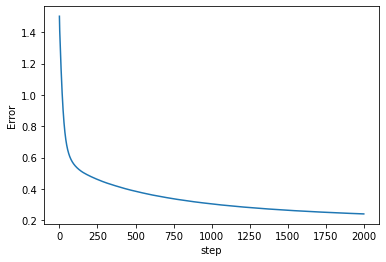

In [150]:
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('step')
plt.show()

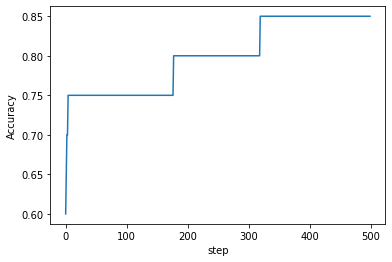

In [148]:
plt.plot(accs)
plt.ylabel('Accuracy')
plt.xlabel('step')
plt.show()

In [153]:
predict(pred_w0, pred_w1, pred_b, np.array([6,1]))

(0.5565061079013099, 1)

In [164]:
data.columns

Index(['Salary', 'WorkTime', 'Status'], dtype='object')

In [175]:
pred = pd.DataFrame([[6,1,2]], columns=['Salary', 'WorkTime', 'Status'])
temp_df = pd.concat([data, pred], ignore_index=True)
temp_df

,Salary,WorkTime,Status
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [178]:
_deepnote_run_altair(temp_df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"Salary","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"WorkTime","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"Status","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [245]:
XOR = pd.DataFrame(np.array([[1,0,1],[0,1,1],[0,0,0],[1,1,0],],np.int32), columns=['x-axis', 'y-axis', 'bool'])
XOR


,x-axis,y-axis,bool
0,1,0,1
1,0,1,1
2,0,0,0
3,1,1,0


In [246]:
_deepnote_run_altair(XOR, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"point","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"x-axis","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"y-axis","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}},"color":{"field":"bool","type":"quantitative","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [247]:
X = process_x(XOR.drop(['bool'], inplace=False, axis=1))
y = XOR[['bool']]
y = np.array(y).reshape(len(y),)

In [248]:
errors = []
accs = []
eta = 0.05
epochs = 100

pred_w0 = np.random.normal()
pred_w1 = np.random.normal()
pred_b = np.random.normal()

for i in range(epochs):
    pred_w0, pred_w1, pred_b = gradient_step(pred_w0, pred_w1, pred_b, X, y, eta)
    y_hats, c_hats = predict_batch(pred_w0, pred_w1, pred_b, X)
    error = calc_errors(y_hats, y)
    acc = np.equal(c_hats, y).sum()/len(c_hats)
    errors.append(error)
    accs.append(acc)
    if i % 20 == 0:
        print(i)
        eta /= 1.1
        print(f'lr updated to:{eta}')

0
lr updated to:0.045454545454545456
20
lr updated to:0.04132231404958678
40
lr updated to:0.037565740045078885
60
lr updated to:0.03415067276825353
80
lr updated to:0.03104606615295775


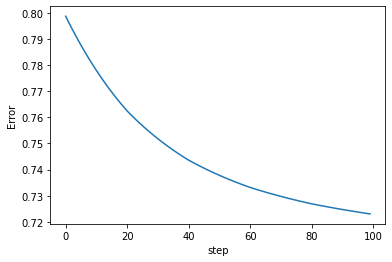

In [249]:
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('step')
plt.show()

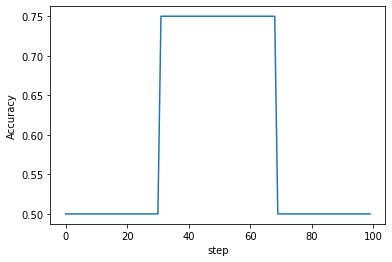

In [250]:
plt.plot(accs)
plt.ylabel('Accuracy')
plt.xlabel('step')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02575d8b-6aba-4808-bd13-66c094e81e0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>